In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

In [2]:
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("RdBu")

In [3]:
data = pd.read_csv("bike_train.csv", parse_dates=["datetime"])

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day_week    10886 non-null  int64         
 15  day_name    10886 non-null  object        
 16  hour        10886 non-

In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1. Extracting features from the datetime column

In [6]:
# it is very useful to both EDA and modeling if we unpack the datetime column into various features such
# as day of the week, hour, month as well as year to check for temporal trends

data['year'] = data['datetime'].dt.year
print(data['year'].value_counts(normalize=True).sort_index())

data['month'] = data['datetime'].dt.month
print(data['month'].value_counts(normalize=True).sort_index())

data['day_week'] = data['datetime'].dt.dayofweek
data['day_name'] = data['datetime'].dt.day_name()
print(data['day_week'].value_counts(normalize=True).sort_index())
print(data['day_name'].value_counts(normalize=True).sort_index())


data['hour'] = data['datetime'].dt.hour
print(data['hour'].value_counts(normalize=True).sort_index())

2011    0.498071
2012    0.501929
Name: year, dtype: float64
1     0.081205
2     0.082767
3     0.082767
4     0.083502
5     0.083777
6     0.083777
7     0.083777
8     0.083777
9     0.083502
10    0.083685
11    0.083685
12    0.083777
Name: month, dtype: float64
0    0.142477
1    0.141374
2    0.142477
3    0.142660
4    0.140456
5    0.145508
6    0.145049
Name: day_week, dtype: float64
Friday       0.140456
Monday       0.142477
Saturday     0.145508
Sunday       0.145049
Thursday     0.142660
Tuesday      0.141374
Wednesday    0.142477
Name: day_name, dtype: float64
0     0.041797
1     0.041705
2     0.041154
3     0.039776
4     0.040603
5     0.041521
6     0.041797
7     0.041797
8     0.041797
9     0.041797
10    0.041797
11    0.041797
12    0.041889
13    0.041889
14    0.041889
15    0.041889
16    0.041889
17    0.041889
18    0.041889
19    0.041889
20    0.041889
21    0.041889
22    0.041889
23    0.041889
Name: hour, dtype: float64


## 2. EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day_week    10886 non-null  int64         
 15  day_name    10886 non-null  object        
 16  hour        10886 non-

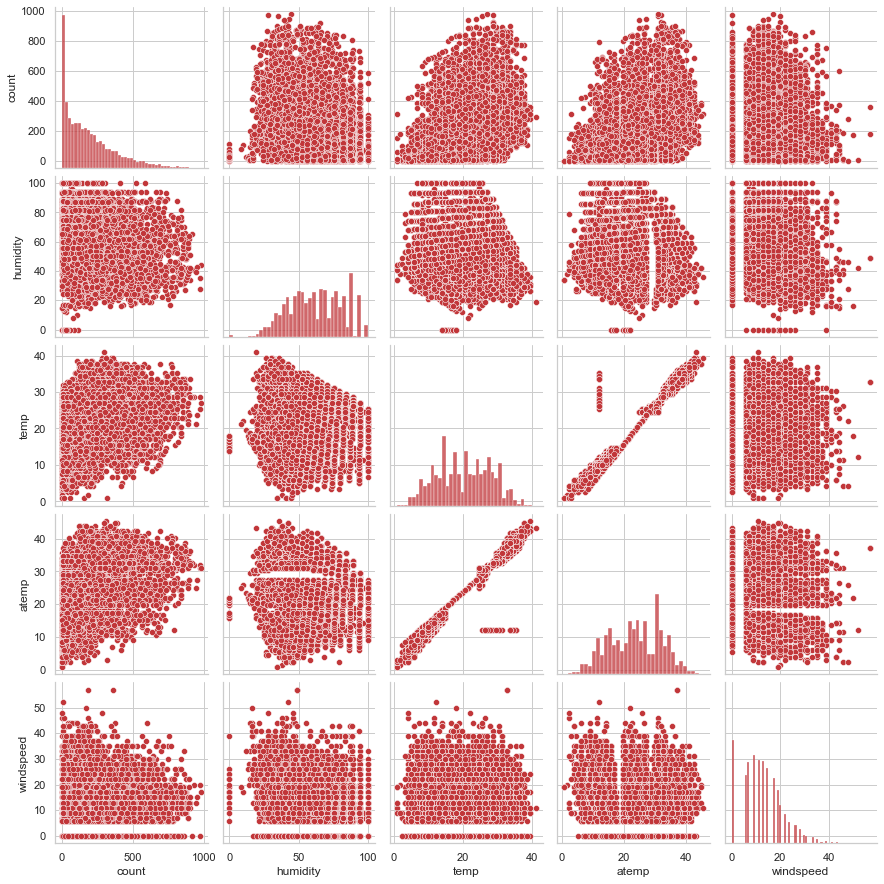

In [8]:
# plotting distributions and pairwise plots with count and continuous features

sns.pairplot(data[['count', 'humidity', 'temp', 'atemp', 'windspeed']])
plt.show()

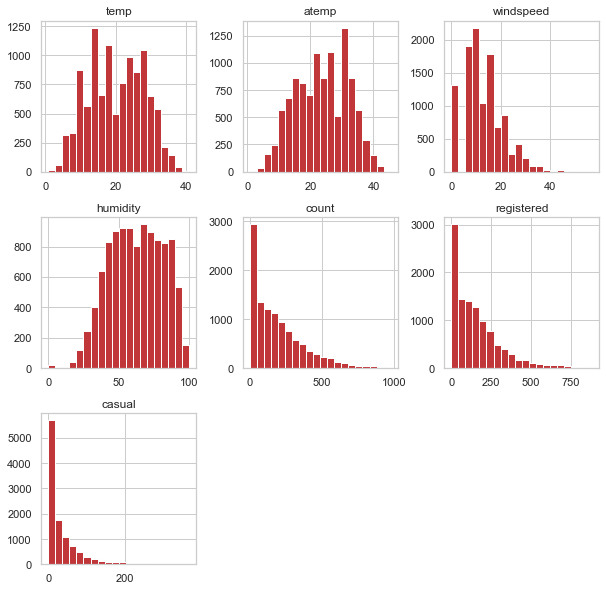

In [9]:
# exploring distributions of continuous variables and count
cont_vars = ['temp', 'atemp', 'windspeed', 'humidity']
targets = ['count', 'registered', 'casual']

data[cont_vars+targets].hist(bins=20, figsize=(10,10))

plt.show()

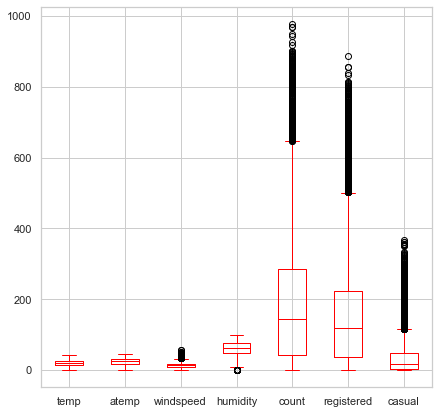

In [10]:
# does these continuous vars have outliers ?

data[cont_vars+targets].boxplot(figsize=(7,7), color='r')

plt.show()

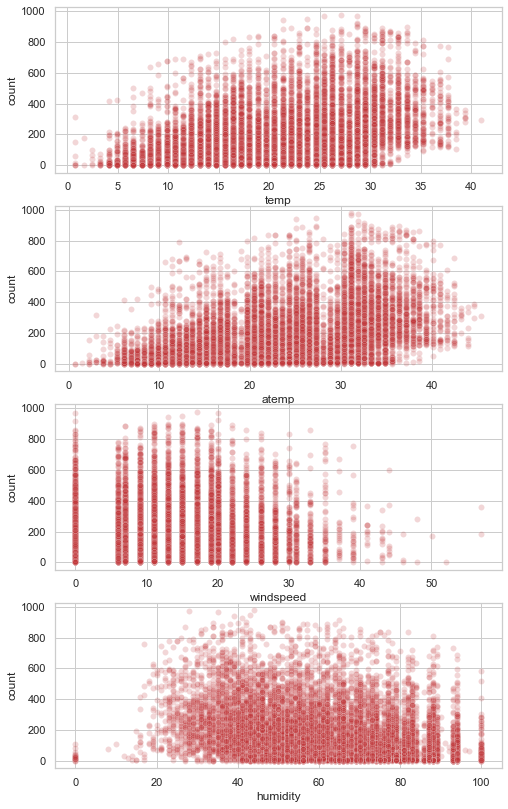

In [11]:
# exploring relationship between count and continuous variables


fig, ax = plt.subplots(len(cont_vars), 1, figsize=(8,14))

for i, var in enumerate(cont_vars):
    sns.scatterplot(x=data[var], y=data['count'], alpha=0.2, ax = ax[i])

plt.show()

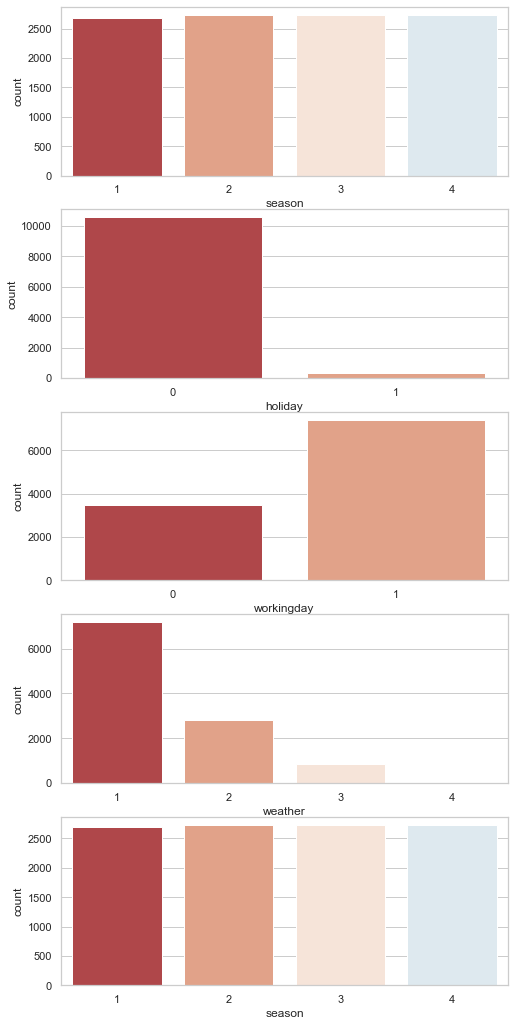

In [12]:
# what is the number of occurences of each of the categorical/discrete variables in the data ? 

cat_vars = ['season', 'holiday', 'workingday', 'weather', 'season']

fig, ax = plt.subplots(len(cat_vars), 1, figsize=(8,18))

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=data, ax=ax[i])

plt.show()    

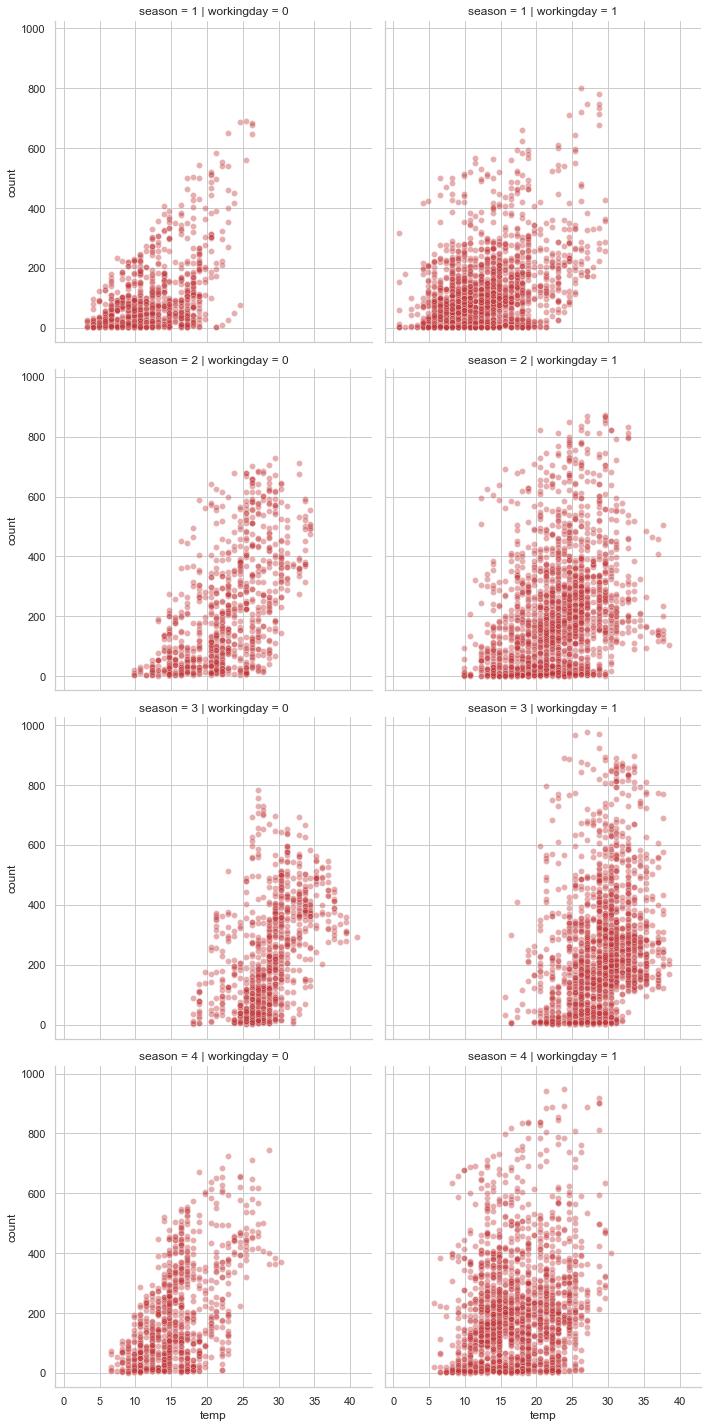

In [13]:
# there seems to be a positive correlation between atemp, temp and the count of hired bikes
# let's control for season and workingday to see if the correlation holds

sns.relplot(x="temp", y="count", row="season", col="workingday", data=data, alpha=0.4)
plt.show()

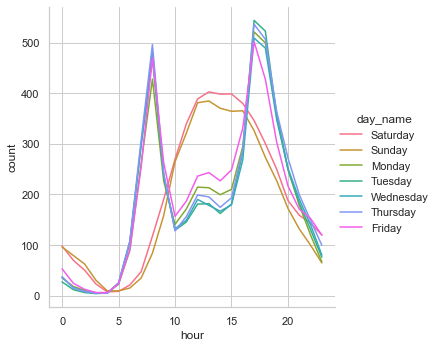

In [14]:
# next we can explore temporal trends, like how count changes over the hours of the day, days of the week, and months

# plot the mean count of bikes rented every hour of the day grouped by day of the week and
# display with and without the 95% confidence interval on the figure

sns.relplot(x="hour", y="count", data=data, kind="line", style="day_name", hue="day_name", markers=False, 
            dashes=False, ci=None)
plt.show()

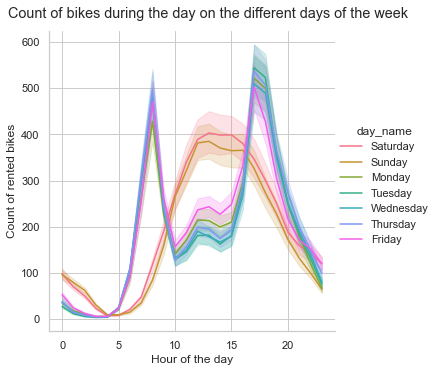

In [15]:
# it is obvious that bikes are rented out more during peak morning hours and peak afternoon hours 
# (going to and from work) during all weekdays except saturday and sunday, which have a different distribution

g = sns.relplot(x="hour", y="count", data=data, kind="line", style="day_name", hue="day_name", markers=False, 
            dashes=False)
g.set(xlabel="Hour of the day", ylabel="Count of rented bikes")
g.fig.suptitle("Count of bikes during the day on the different days of the week", y=1.03)
plt.show()

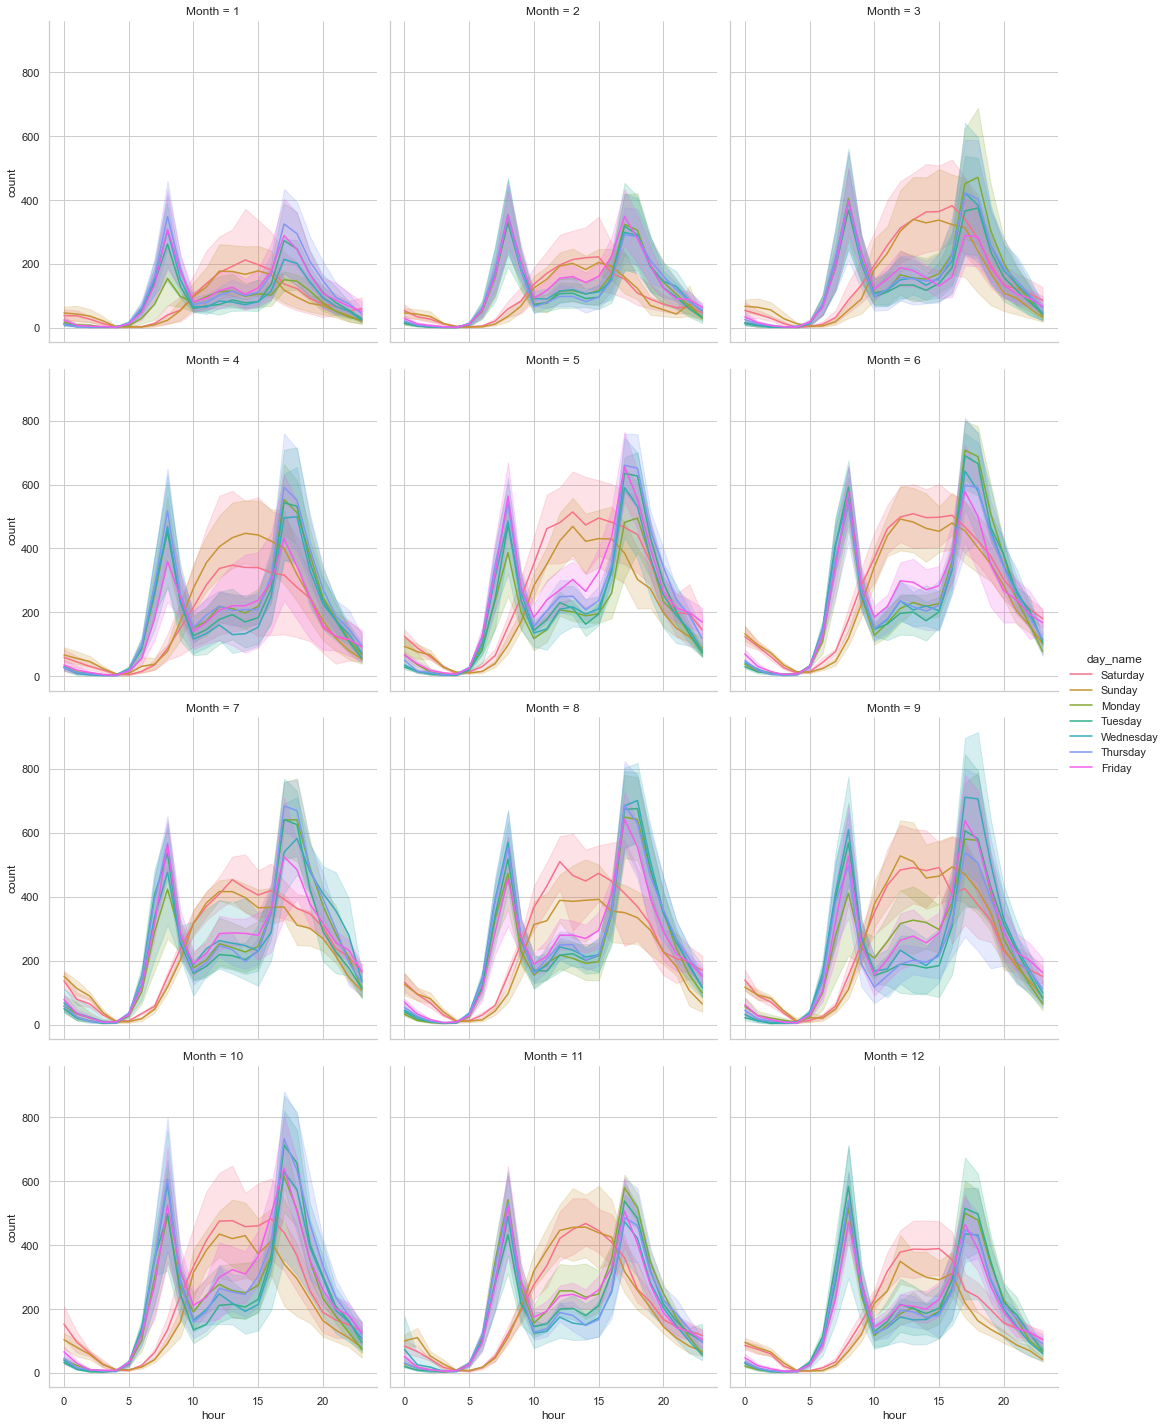

In [16]:
# the trend is the same if we looked at every month, but it is obvious the count levels are higher during certain
# months/seasons

g=sns.relplot(x="hour", y="count", data=data, kind="line", style="day_name", hue="day_name", col="month", 
            col_wrap= 3 ,markers=False, dashes=False)
g.set_titles("Month = {col_name}")
plt.show()

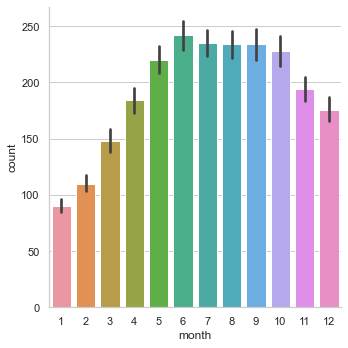

In [17]:
sns.catplot(x="month", y="count", data=data, kind="bar")
plt.show()

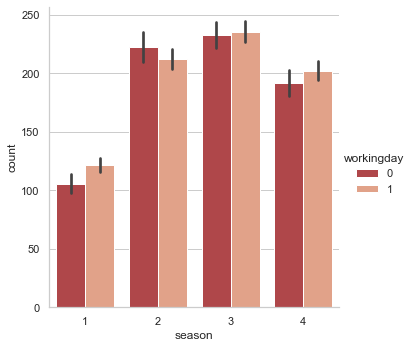

In [18]:
sns.catplot(x="season", y="count", hue="workingday",data=data, kind="bar")
plt.show()

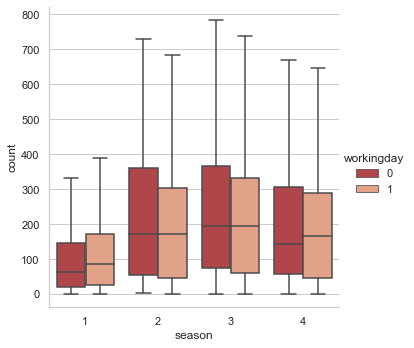

In [19]:
sns.catplot(x="season", y="count", hue="workingday", data=data, kind="box", sym="")
plt.show()

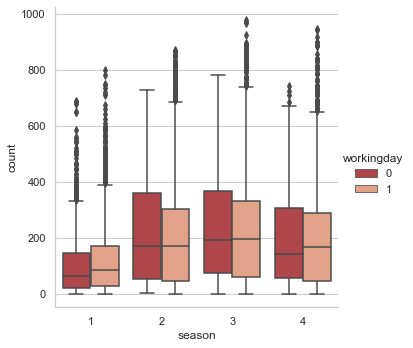

In [20]:
sns.catplot(x="season", y="count", hue="workingday", data=data, kind="box")
plt.show()

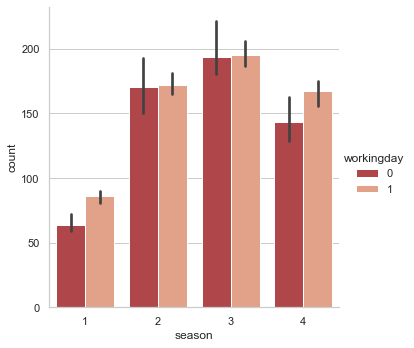

In [21]:
# since there are quite a bit of outliers in count, it is better to compare between categories using the median
# not the mean

# we can see that in fall and summer the medians are quite the same for working days and non working days
# in winter and spring the median of working days looks significantly higher
sns.catplot(x="season", y="count", hue="workingday",data=data, kind="bar", estimator=np.median)
plt.show()

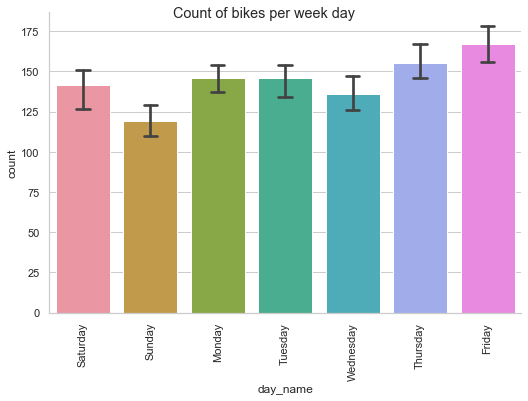

In [22]:
g = sns.catplot(x="day_name", y="count",data=data, kind="bar", estimator=np.median, height=5, aspect=1.5, capsize=0.2)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Count of bikes per week day")
plt.show()

## 3. Fit a baseline linear regression model

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day_week    10886 non-null  int64         
 15  day_name    10886 non-null  object        
 16  hour        10886 non-

In [24]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

In [25]:
numeric_columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day_week', 'hour'],
      dtype='object')

In [26]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['day_name'], dtype='object')

In [27]:
data_oh = pd.get_dummies(data, columns=['day_name', 'season', 'weather', 'hour', 'year'])
data_oh.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'month', 'day_week',
       'day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'year_2011', 'year_2012'],
      dtype='object')

In [28]:
data_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   holiday             10886 non-null  int64         
 2   workingday          10886 non-null  int64         
 3   temp                10886 non-null  float64       
 4   atemp               10886 non-null  float64       
 5   humidity            10886 non-null  int64         
 6   windspeed           10886 non-null  float64       
 7   casual              10886 non-null  int64         
 8   registered          10886 non-null  int64         
 9   count               10886 non-null  int64         
 10  month               10886 non-null  int64         
 11  day_week            10886 non-null  int64         
 12  day_name_Friday     10886 non-null  uint8         
 13  day_name_Monday     10886 non-null  uint8     

In [29]:
X = data_oh.drop(['datetime', 'count', 'casual', 'registered'], axis=1)
y = data_oh['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)


In [30]:
baseline_reg = LinearRegression()
baseline_reg.fit(X_train, y_train)
y_pred = baseline_reg.predict(X_test)


In [31]:
print(baseline_reg.score(X_train, y_train))
print(baseline_reg.score(X_test, y_test))

0.6970224120454049
-2.127116970350121e+16


In [32]:
r2_score(y_test, y_pred)

-2.127116970350121e+16

In [33]:
np.sqrt(mean_squared_log_error(y_test, abs(y_pred)))

1.0912981022957595

In [34]:
print(y_pred.max(), y_pred.min())

617.58203125 -1502307149567.3643


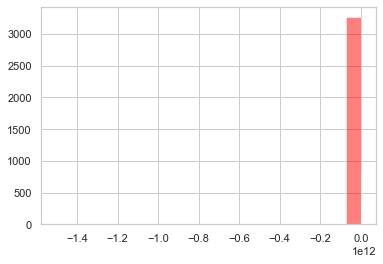

In [35]:
fig, ax = plt.subplots()

ax.hist(y_pred, bins=20, color='r', alpha=0.5)
ax.hist(y_test, bins=20, color='b', alpha=0.5)
plt.show()

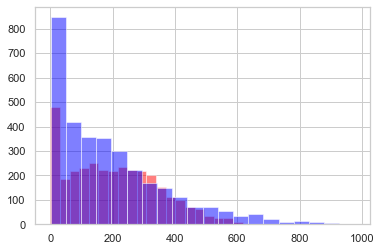

In [36]:
y_pred_adj = np.where(y_pred < 0, 0, y_pred) # replacing negative values with 0

fig, ax = plt.subplots()

ax.hist(y_pred_adj, bins=20, color='r', alpha=0.5)
ax.hist(y_test, bins=20, color='b', alpha=0.5)
plt.show()

In [37]:
np.sqrt(mean_squared_log_error(y_test, y_pred_adj))

1.0893003218665642

In [38]:
r2_score(y_test, y_pred_adj)

0.6918210817152961

## 4. Feature Engineering

In [39]:
# instead of leaving hours as is, we can categorize it into 4 equal sections of 6 hours

bins = [-np.inf, 6, 12, 18, np.inf]

labels = ['night', 'morning', 'afternoon', 'evening']

data['day_period'] = pd.cut(data['hour'],bins=bins, labels=labels)

In [41]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_week,day_name,hour,day_period
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,Saturday,0,night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,Saturday,1,night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,Saturday,2,night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,Saturday,3,night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,Saturday,4,night


In [46]:
pd.pivot_table(index='day_period', columns='workingday', values='count', aggfunc='mean', data=data)

workingday,0,1
day_period,,
night,40.594648,28.786385
morning,217.625287,250.454594
afternoon,356.545977,315.552519
evening,157.769655,202.168489


In [ ]:
data.info()

In [ ]:
X = data.drop(['datetime', 'casual', 'registered', 'count', 'hour', 'month', 'day_week'], axis=1)
y = data['count']

In [ ]:
X.info()

In [ ]:
categorical_vars = ['season', 'weather', 'year', 'day_name', 'day_period']
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed']
binary_vars = ['holiday', 'workingday']

preprocessor = ColumnTransformer(transformers=[
        ('numeric', StandardScaler() , numeric_vars),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_vars),
        ('binary', 'passthrough', binary_vars)])

In [ ]:
pipeline = Pipeline([
     ('preprocessor', preprocessor),
     ('reg', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
np.sqrt(mean_squared_log_error(y_test, abs(y_pred)))

In [ ]:
print(r2_score(y_test, abs(y_pred)), r2_score(y_test, y_pred))